# vanZadelhoff benchmark: 1a

We run the benchmarking problems by van Zadelhoff et al (2002) using Magritte.

## 0) Setup

In [12]:
# Define Magritte folders

MagritteSetupFolder = '/home/frederik/Dropbox/Astro/Magritte/modules/setup/'
ProjectFolder       = '/home/frederik/MagritteProjects/VanZadelhoff/'

In [13]:
# Import tools and libraries

import numpy as np

from bokeh.plotting import figure, show, gridplot
from bokeh.palettes import cividis
from bokeh.io       import output_notebook
output_notebook()

from glob import glob
from sys  import path
path.insert(0, MagritteSetupFolder)

# Import from MagritteSetupFolder
from spheres  import deSphere, sphereVar, nRays
from lineData import LineData, planck, relativeDifference
from setup    import setupMagritte
from model    import mapToXD
from model    import model as Model

Loading BokehJS ...

## 1) Define model

Assume a spherically symmetric model described by

\begin{align}
T(r)     \ &= \ 20 \text{ K}                            \\
\rho(r)  \ &= \ \rho(r_{0}) \ \left(r/r_{0}\right)^{-2} \\
n_{i}(r) \ &= \ X_{\text{mol}} \ \rho(r)                \\
v(r)     \ &= \ 0.0 \text{ m s}^{-1}
\end{align}


In [14]:
n_H2  = 2.0E13   # [m^-3]

X_mol = 1.0E-8   # []

r_in  = 1.0E13   # [m]
r_out = 7.8E16   # [m]

T     = 20.0     # [K]

def rho (r):
    return n_H2 * np.power(r/r_in, -2.0)

There is CMB radiation incoming on both ends of the ray as boundary condition.

In [15]:
# Setup model

model = Model (dim=1)

model.ncells = 15

base = 10
log_r_in  = np.log(r_in)  / np.log(base)
log_r_out = np.log(r_out) / np.log(base)


model2D = Model (dim=2)

def circle (r, npoints):
    model2D.x += [r*np.cos(i*2*np.pi/npoints) for i in range(npoints)]
    model2D.y += [r*np.sin(i*2*np.pi/npoints) for i in range(npoints)]
    model2D.ncells += npoints

npoints = 1000
    
for i in range(npoints):
    r     = r_in/(i+1.0)
    theta = 50*i*2*np.pi/npoints
    model2D.x += [r*np.cos(theta)]
    model2D.y += [r*np.sin(theta)]
model2D.ncells += npoints

#circle(1,500)

# model.x = np.logspace (log_r_in, log_r_out, model.ncells, base=base, endpoint=True)
# #model.x = np.linspace (r_in, r_out, model.ncells, endpoint=True)
# model.y = [0.0 for _ in range(model.ncells)]
# model.z = [0.0 for _ in range(model.ncells)]

# model.density     = rho(model.x)
# model.abundance   = X_mol * model.density
# model.temperature = [T for _ in range(model.ncells)]

# model.vx = [0.0 for _ in range(model.ncells)]
# model.vy = [0.0 for _ in range(model.ncells)]
# model.vz = [0.0 for _ in range(model.ncells)]

# # Define nsidesList for mapping to 3D model
# nraysList = [int(2.0*np.pi*i) for i in range(model.ncells)]

# # Map 1D model to spherically symmetric 2D model
# (model2D, cellsInShell) = mapToXD(model, dimension=2, nraysList=nraysList)

# #model2D.boundary = model2D.boundary + cellsInShell[0]

# # Define rays
# model2D.defineRays (nrays=50)

# # Write new model data
# model2D.writeInput (ProjectFolder + 'Magritte_files/')

# # Run setup
# setupMagritte (projectFolder = ProjectFolder, runName = 'problem_1a')

print(f'ncells in 2D model = {model2D.ncells}')
print(f'nrays  in 2D model = {model2D.nrays} ')

ncells in 2D model = 1000
nrays  in 2D model = 0 


In [9]:
# Setup model

model = Model (dim=1)

model.ncells = 25

base = 10
log_r_in  = np.log(r_in)  / np.log(base)
log_r_out = np.log(r_out) / np.log(base)

model.x = np.logspace (log_r_in, log_r_out, model.ncells, base=base, endpoint=True)
#model.x = np.linspace (r_in, r_out, model.ncells, endpoint=True)
model.y = [0.0 for _ in range(model.ncells)]
model.z = [0.0 for _ in range(model.ncells)]

model.density     = rho(model.x)
model.abundance   = X_mol * model.density
model.temperature = [T for _ in range(model.ncells)]

model.vx = [0.0 for _ in range(model.ncells)]
model.vy = [0.0 for _ in range(model.ncells)]
model.vz = [0.0 for _ in range(model.ncells)]

# Define nsidesList for mapping to 3D model
nraysList = [int(2.0*np.pi*np.log(i+1)) for i in range(model.ncells)]

# Map 1D model to spherically symmetric 2D model
(model2D, cellsInShell) = mapToXD(model, dimension=2, nraysList=nraysList)

#model2D.boundary = model2D.boundary + cellsInShell[0]

# Define rays
model2D.defineRays (nrays=200)

# Write new model data
model2D.writeInput (ProjectFolder + 'Magritte_files/')

# Run setup
setupMagritte (projectFolder = ProjectFolder, runName = 'problem_1a')

print(f'ncells in 2D model = {model2D.ncells}')
print(f'nrays  in 2D model = {model2D.nrays} ')

IndexError: list index out of range

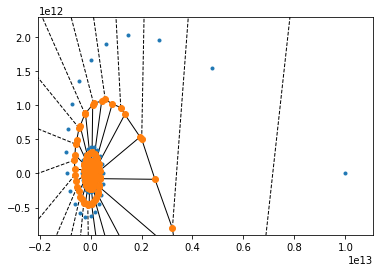

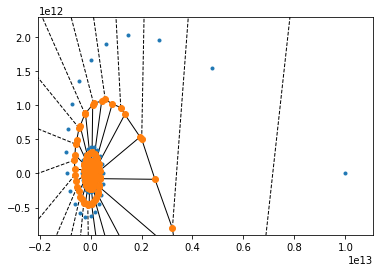

In [11]:
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
%matplotlib inline

points = [[model2D.x[p], model2D.y[p]] for p in range(model2D.ncells)]
vor    = Voronoi(points)

voronoi_plot_2d(vor)

In [7]:
# Plot model
plot_model_1 = figure (plot_width=400, plot_height=250, y_axis_type='log')
plot_model_1.line (model.x, model.density)
plot_model_1.xaxis.axis_label = "x [m]"
plot_model_1.yaxis.axis_label = "density [m^-3]"

plot_model_2 = figure (plot_width=400, plot_height=250, y_axis_type='log')
plot_model_2.line (model.x, model.abundance)
plot_model_2.xaxis.axis_label = "x [m]"
plot_model_2.yaxis.axis_label = "abundance [xm^-3]"

plot_model_3 = figure(plot_width=400, plot_height=250)
plot_model_3.line (model.x, model.temperature)
plot_model_3.xaxis.axis_label = "x [m]"
plot_model_3.yaxis.axis_label = "temperature [K]"

plot_model_4 = figure(plot_width=400, plot_height=250)
plot_model_4.line (model.x, model.vx)
plot_model_4.xaxis.axis_label = "x [m]"
plot_model_4.yaxis.axis_label = "velocity_x [m^-3]"

plot_model = gridplot ([[plot_model_1, plot_model_2],[plot_model_3, plot_model_4]])

show (plot_model)

### Get Magritte output

In [8]:
# Read Magritte output

ioFolders = glob(ProjectFolder + 'io/*/')
ioFolders.sort()

inputFolders  = [folder +  'input/' for folder in ioFolders]
outputFolders = [folder + 'output/' for folder in ioFolders]

lastOutput = outputFolders[-1]
lastInput  =  inputFolders[-1]

pops_files = glob(lastOutput + 'populations_0*.txt')
Jeff_files = glob(lastOutput + 'Jeff_0*.txt')
J_files    = glob(lastOutput + 'J_*.txt')
G_files    = glob(lastOutput + 'G_*.txt')
nu_files   = glob(lastOutput + 'frequencies_nu*.txt')
lnr_files  = glob(lastOutput + 'frequencies_line_nr*.txt')
eta_files  = glob(lastOutput + 'eta_0*.txt')
chi_files  = glob(lastOutput + 'chi_0*.txt')

pops_files.sort()
Jeff_files.sort()
eta_files.sort()
chi_files.sort()

pops_2D_data = [np.loadtxt(fileName) for fileName in pops_files]
Jeff_2D_data = [np.loadtxt(fileName) for fileName in Jeff_files]
J_2D_data    = [np.loadtxt(fileName) for fileName in J_files]
G_2D_data    = [np.loadtxt(fileName) for fileName in G_files]
nu_2D_data   = [np.loadtxt(fileName) for fileName in nu_files]
lnr_2D_data  = [np.loadtxt(fileName) for fileName in lnr_files]
eta_2D_data  = [np.loadtxt(fileName) for fileName in eta_files]
chi_2D_data  = [np.loadtxt(fileName) for fileName in chi_files]

# Import linedata
lineData = LineData (ProjectFolder + '/Magritte_files/linedata/test.txt')

### Map sphere to 1D model

In [9]:
# Map shpere to 1D model

pops_data = deSphere(cellsInShell, pops_2D_data)
pops_var  = sphereVar(cellsInShell, pops_2D_data)

J_data = deSphere(cellsInShell, J_2D_data)
J_var  = sphereVar(cellsInShell, J_2D_data)

G_data = deSphere(cellsInShell, G_2D_data)
G_var  = sphereVar(cellsInShell, G_2D_data)

#Jeff_data = deSphere(cellsInShell, Jeff_2D_data)
#Jeff_var  = sphereVar(cellsInShell, Jeff_2D_data)

nu_data = deSphere(cellsInShell, nu_2D_data)
nu_var  = sphereVar(cellsInShell, nu_2D_data)

#lnr_data = deSphere(cellsInShell, lnr_2D_data)
#lnr_var  = sphereVar(cellsInShell, lnr_2D_data)

#etaR   = deSphere(cellsInShell, eta_data)
#etaVar = sphereVar(cellsInShell, eta_data)

#chiR   = deSphere(cellsInShell, chi_data)
#chiVar = sphereVar(cellsInShell, chi_data)

for s in range(model.ncells):
    #print(f'pops_var  = {np.max(pops_var[0][s])}')
    #print(f'Jeff_var  = {np.max(Jeff_var[0][s])}')
    print(f'J_var     = {np.max(J_var[0][s])}')
    #print(f'nu_var    = {np.max(nu_var[0][s])}')
    #print(f'lnr_var   = {np.max(lnr_var[0][s])}')

#print(np.max(etaVar))
#print(np.max(chiVar))

J_var     = 0.0
J_var     = 0.011118696407378632
J_var     = 0.011704751428514307
J_var     = 0.007201310040567835
J_var     = 0.004697216951056475
J_var     = 0.0037850933414339118
J_var     = 0.0034390479914525687
J_var     = 0.002501494499733992
J_var     = 0.002548949921138798
J_var     = 0.0016359856706756868
J_var     = 0.0028987359830402034
J_var     = 0.0034515997346636585
J_var     = 0.003499948194109847
J_var     = 0.003295211431407451
J_var     = 0.005959590620014568
J_var     = 0.010266205971564796
J_var     = 0.01160895283156201
J_var     = 0.016027537150873614
J_var     = 0.01526032256290096
J_var     = 0.014303434654074194
J_var     = 0.013143703931952636
J_var     = 0.011950348058107355
J_var     = 0.01133691019489969
J_var     = 0.009810458623166495
J_var     = 0.0037011461351394203


In [42]:
# Load Ratran results

data_ratran = np.loadtxt('/home/frederik/Codes/Ratran_copy/FrederiksExapmle/output/myTest.pop', skiprows=14)
x_ratran    = np.sqrt(data_ratran[:,1]*data_ratran[:,2]) *1.0E-2
pops_ratran = data_ratran[:,9:]

### Plot output

In [43]:
# Plot functions

def color(s):
    ns = int((s_max-s_min) / s_step + 1)
    es = int((s    -s_min) / s_step)
    return cividis(ns)[es]

def legend(s):
    return f'{s}'

def bokeh_log_plot(title, x, y, xlabel, ylabel):
    return

In [44]:
s_min  = 0
s_max  = model.ncells
s_step = 1

In [45]:
outNr = -1

In [46]:
# Level populations

plot = figure (title='Level populations', width=400, height=400, y_axis_type='log', x_axis_type='log')
x  = np.sqrt(np.power(model2D.x, 2) + np.power(model2D.y,2))
y1 = pops_2D_data[outNr][:,0]/model2D.abundance
y2 = pops_2D_data[outNr][:,1]/model2D.abundance
plot.circle (x, y1, color='red')
plot.circle (x, y2, color='blue')
plot.circle (x_ratran, pops_ratran[:,0], color='black')
plot.circle (x_ratran, pops_ratran[:,1], color='black')
plot.xaxis.axis_label = "r [m]"
plot.yaxis.axis_label = "population [m^-3]"
show (plot)

In [4]:
# Level populations

plot = figure (title='Mean intensity', width=700, height=400, y_axis_type='log', x_axis_type='log')
x  = np.sqrt(np.power(model2D.x, 2) + np.power(model2D.y,2))
y1 = Jeff_2D_data[-1][:]
plot.circle (x, y1, color='red')
#plot.circle (x_ratran, pops_ratran[:,0], color='black')
#plot.circle (x_ratran, pops_ratran[:,1], color='black')
plot.xaxis.axis_label = "r [m]"
plot.yaxis.axis_label = "mean intensity [W m^-2]"
show (plot)

NameError: name 'figure' is not defined

In [16]:
# Level populations

plot = figure (title='Level populations', width=700, height=400, y_axis_type='log', x_axis_type='log')
x = model.x
y1 = pops_data[outNr][:,0]/model.abundance
y2 = pops_data[outNr][:,1]/model.abundance
plot.line (x, y1)
plot.line (x, y2)
plot.xaxis.axis_label = "r [m]"
plot.yaxis.axis_label = "population [m^-3]"
show (plot)

In [17]:
np.shape(pops_data)

(3, 40, 2)

In [18]:
# Mean intensity

plot = figure (title='Total mean intensity', width=700, height=400, y_axis_type='log')
for s in range(s_min, s_max, s_step):
    x = range(lineData.nrad)
    y = Jeff_data[1][s]
    plot.circle(x, y, color=color(s), legend=legend(s))
plot.xaxis.axis_label = "number of the transition"
plot.yaxis.axis_label = "mean intensity J [m^-3]"
show(plot)

NameError: name 'Jeff_data' is not defined

In [19]:
# Spectrum

plot = figure (title='Spectrum', width=700, height=500, y_axis_type='log')
for s in range(s_min, s_max, s_step):
    x = nu_data[outNr][s]
    y =  J_data[outNr][s]
    plot.line(x, y, color=color(s), legend=legend(s))
plot.xaxis.axis_label = "frequencies [Hz]"
plot.yaxis.axis_label = "Mean intensity [W/m^2]"
show(plot)

In [20]:
# Flux (G) spectrum

plot = figure (title='Spectrum', width=700, height=500)
for s in range(s_min, s_max, s_step):
    x = nu_data[outNr][s]
    y =  G_data[outNr][s]
    plot.line(x, y, color=color(s), legend=legend(s))
plot.xaxis.axis_label = "frequencies [Hz]"
plot.yaxis.axis_label = "Mean intensity [W/m^2]"
show(plot)

In [38]:
line = 0

In [3]:
# Line

plot = figure (title='Line model', width=400, height=400, y_axis_type="log")
for s in range (s_min, s_max, s_step):
    x = nu_data[0][s]
    y =  J_data[0][s]
    plot.circle (x, y, color=color(s), legend=legend(s))
    
show (plot)

NameError: name 'figure' is not defined